<a href="https://colab.research.google.com/github/priya-nath/Breast_Cancer_Prediction_Using_ML_Classification/blob/master/Breast_Cancer_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Prediction using Machine Learning Classification**

---



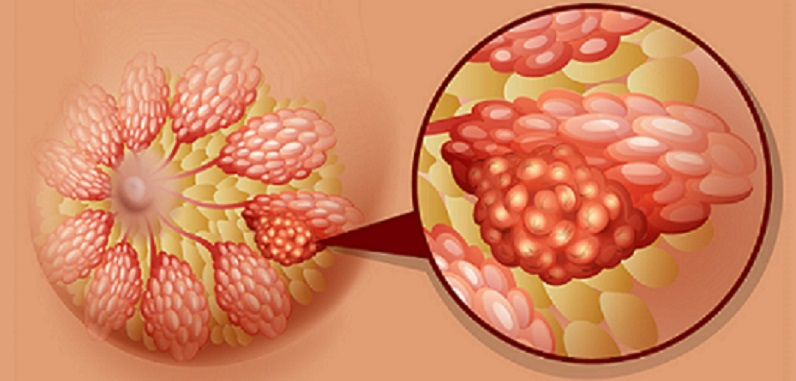

Image source - https://images.app.goo.gl/6vpi6R2tszq3NJUS7

As per the statistics, nearly 12-13% women worldwide are suffering from breast cancer and the rate is increasing with due course of time. The patient might
even die, if not diagnosed and taken proper medications on time. The doctors are only able to detect 70-80% accurately which might cause a serious threat to the undiagnosed patients suffering from breast cancer. Using Machine Learning, it can be diagnosed with more than 95% accuracy.

# **Aim of the Project**
The project aims to create a Machine Learning classifier which using the given parameters from the dataset predicts whether the cell is Malignant(cancerous) or Benign(not cancerous).

# **Importing various python libraries**

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Breast_cancer_Data.csv to Breast_cancer_Data.csv


#**Reading the Dataset**
The dataset is taken from kaggle (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Breast_cancer_Data.csv']))

# **Dataset Desciption**
The Dataset contains 569 rows and 32 columns. A few of the columns are described below.


*   id - This id no. is alloted to each patient and is unique.
*   diagnosis - This would be our target variable, 'M' means Malignant tumour(cancerous) and 'B' means Benign tumour(non-cancerous)
*   radius - The distance from the center to the perimeter of the cell
*   texture - The standard deviation of gray-scale values
*   perimeter_mean - Mean of the perimeter
*   area_mean - Mean of the area of the cell
*   smoothness - The local variation in radius lengths
*   concavity - The severity of concave patterns on the contour
*   symmetry
*   fractal_dimension

The mean value, standard error and worst features were computed for each image, resulting in 30 features.


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

It is observed that only 1 column has all its entries NULL. That column is dropped.

In [9]:
df = df.drop(['Unnamed: 32'], axis = 1)

#**Data Visualization**
It can be observed that 62.7% (357 out of 569) of the people were having Benign tumours (non-cancerous) and 37.3% (212 out of 569) of them were having Malignant tumours (Cancerous).

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

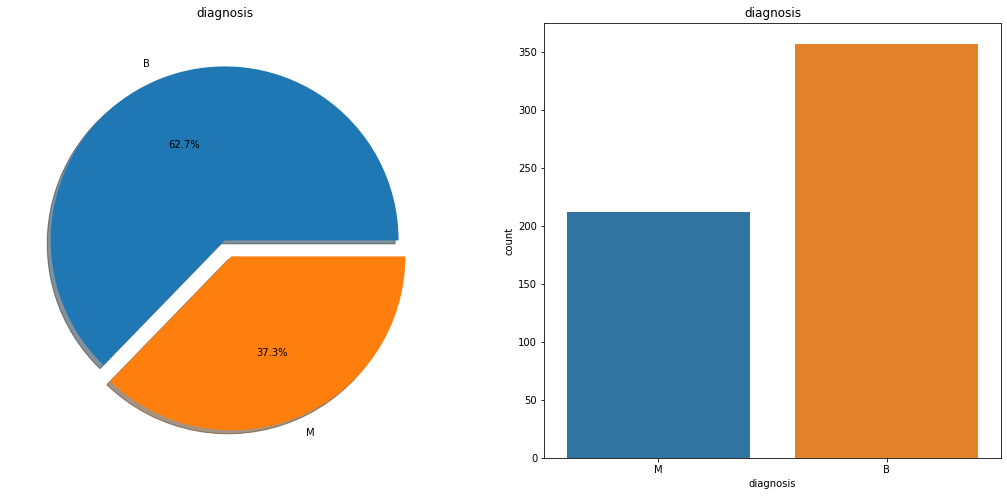

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=df,ax=ax[1])
ax[1].set_title('diagnosis')
plt.show()

# M is for malignant, B is for benign

**The pairplot of all some of the relevant features is plotted which visualises the relation between them.**

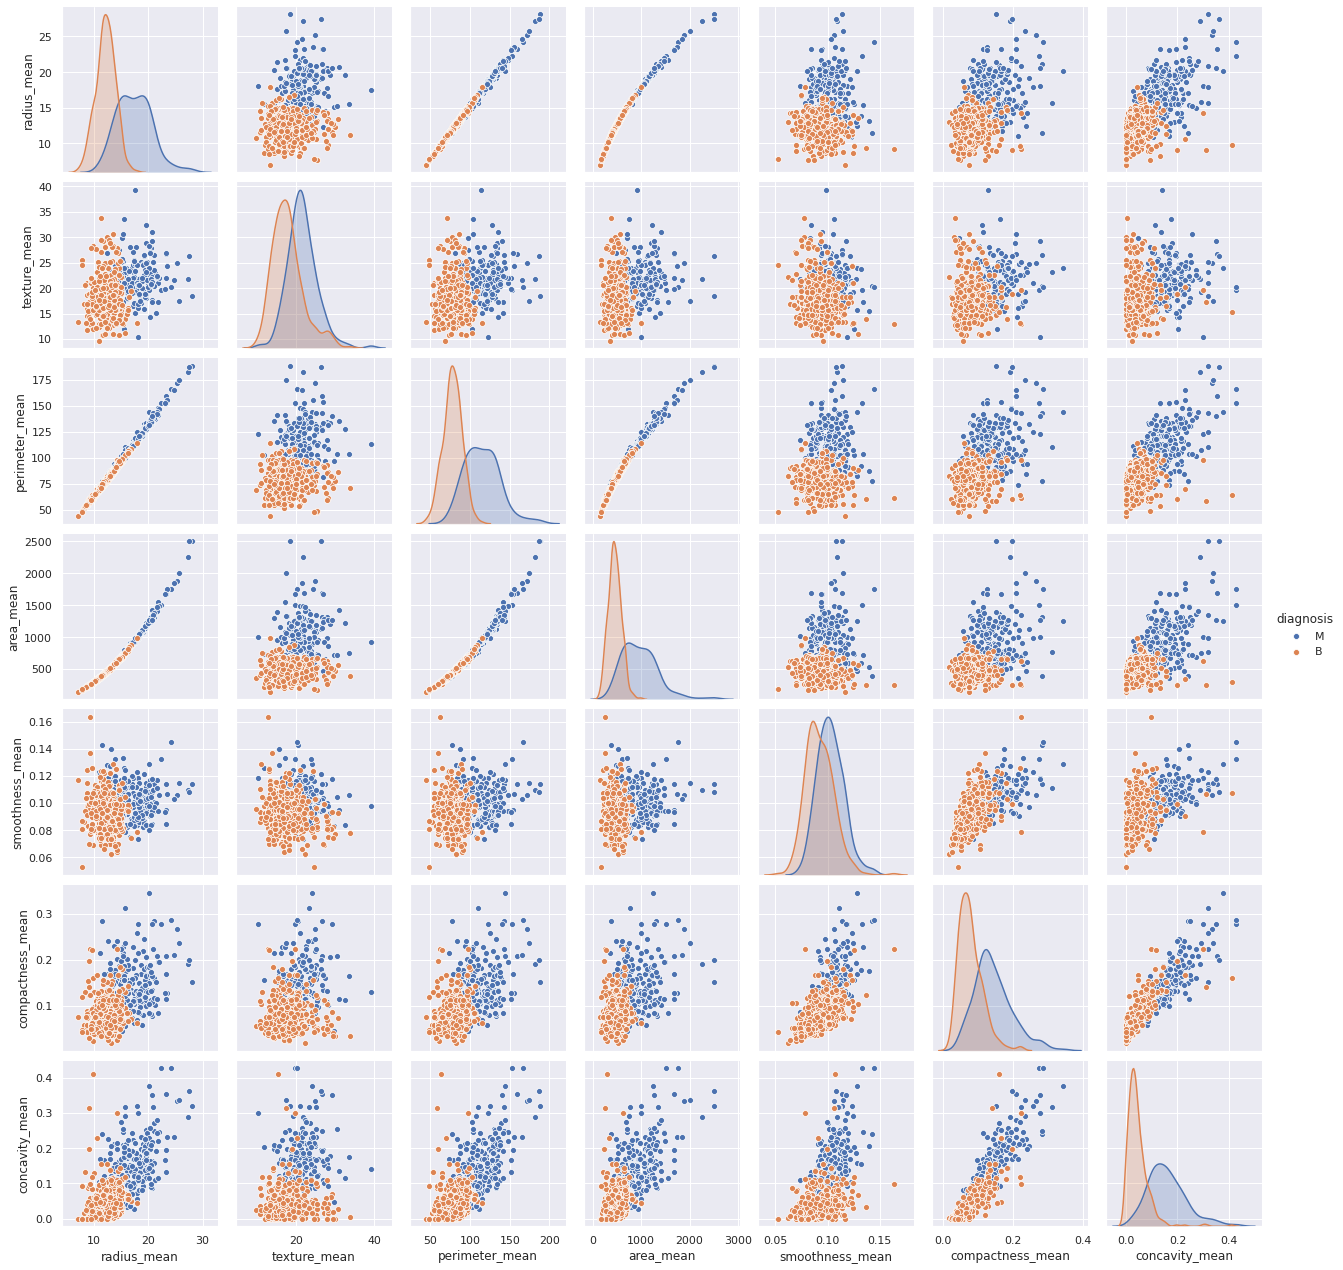

In [12]:
#pairplot of a sample of features
sns.set()
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',	'concavity_mean', 'diagnosis']
sns.pairplot(df[cols], hue = 'diagnosis', height = 2.5)
plt.show();

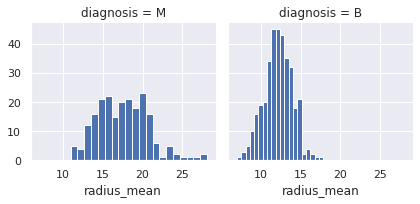

In [13]:
# Histogram betweeen radius_mean and diagnosis
g=sns.FacetGrid(df, col = 'diagnosis')
g.map(plt.hist,'radius_mean', bins = 20)

**Mapping B(Benign) to 0 and M(cancerous) to 1**

In [14]:
mapping = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(mapping)

**Correlation matrix using heatmap**

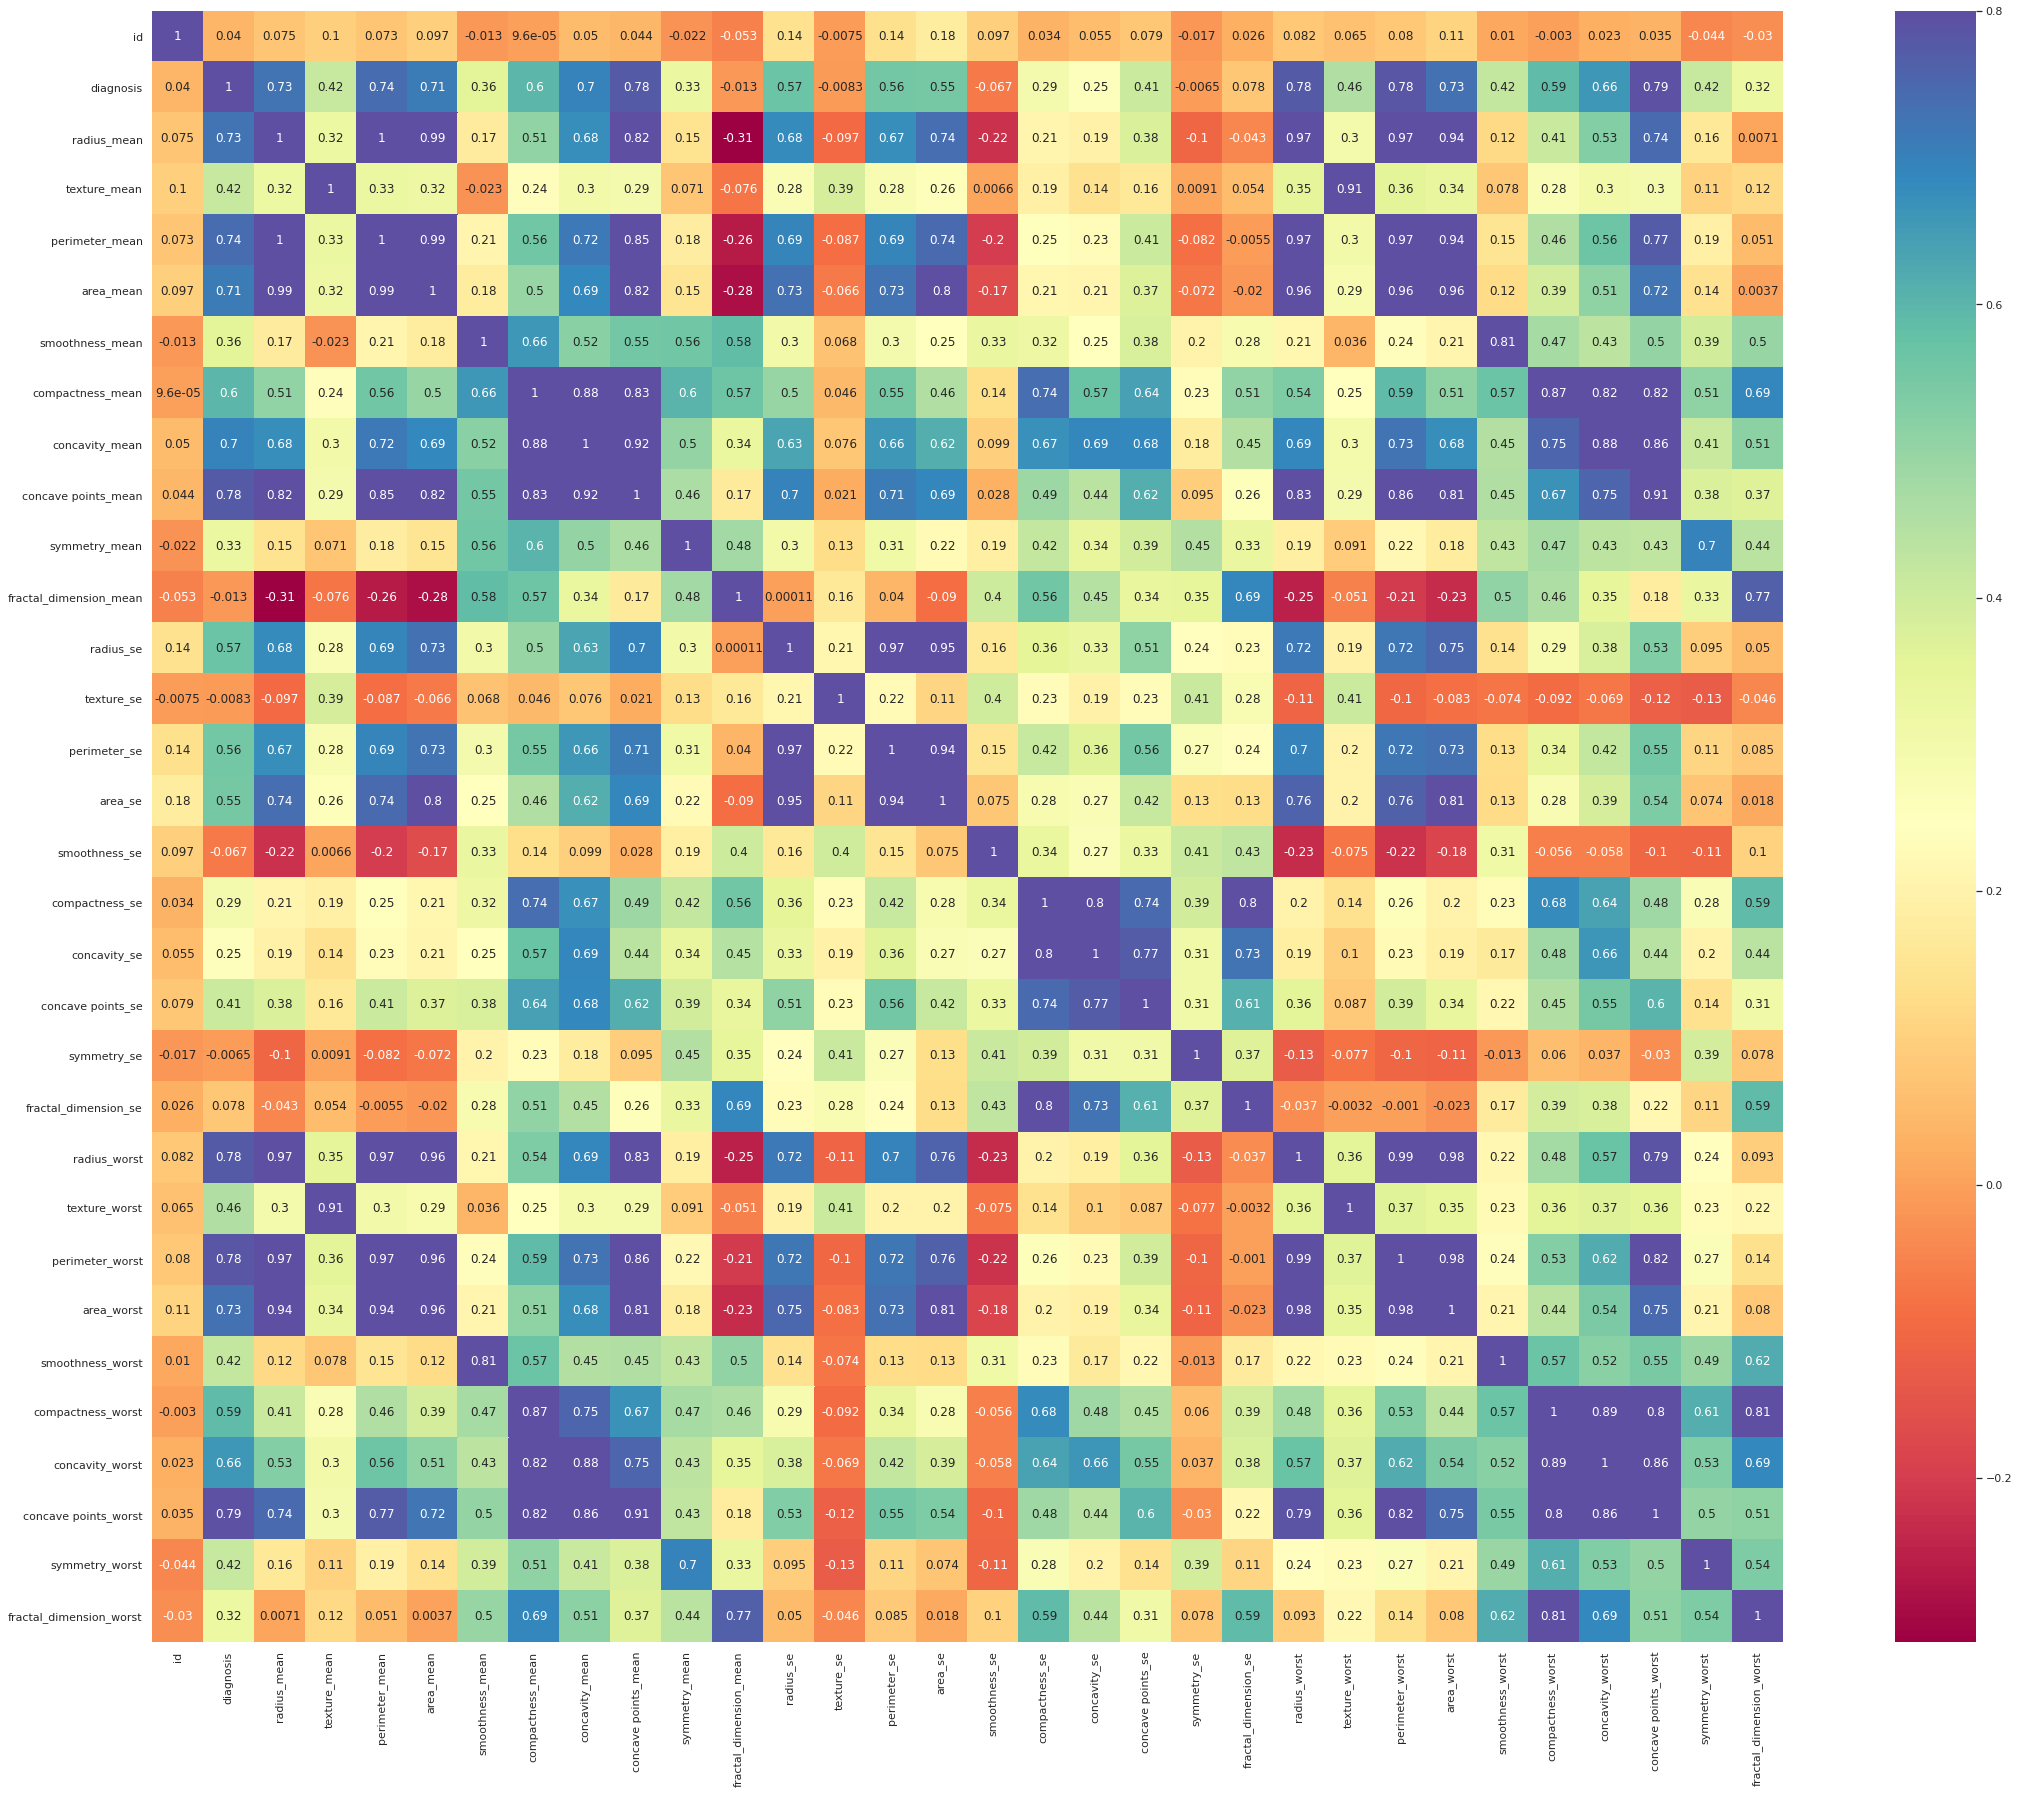

In [15]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True, cmap = 'Spectral');

**Correlation Barplot**

The correlation between different variables and the target is shown.

In [16]:
#a new dataframe is created dropping our target variable
df1 = df.drop(['diagnosis'], axis = 1)

There exists positive correlation between diagnosed benign and 'smoothness_error', very less positive correlation with 'fractal_dimension_mean', 'texture_error' and 'symmetry_error'. Rest all other factors shows negative correlation with diagnosed as benign(0).

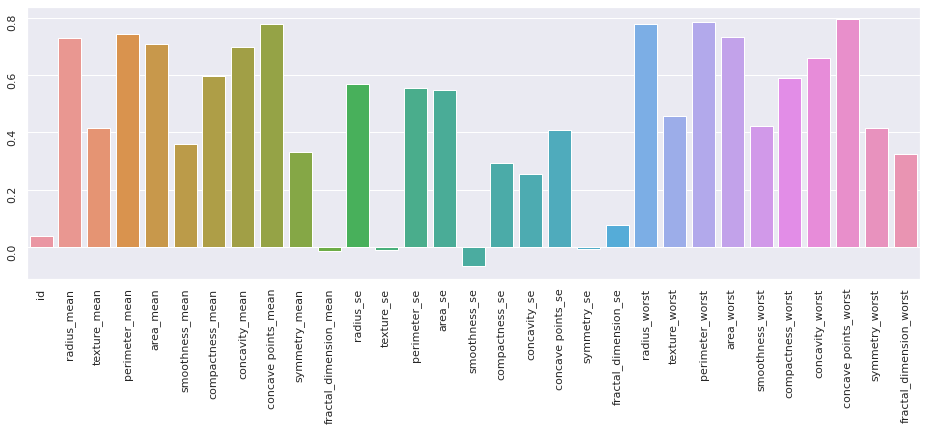

In [17]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(df1.corrwith(df.diagnosis).index, df1.corrwith(df.diagnosis))
ax.tick_params(labelrotation = 90)

#**Data Preprocessing**

In [18]:
df_new = df
df_new.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**The less correlated values are dropped to get a better dataset.**

In [19]:
df_new = df_new.drop(['id','fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis = 1)

**Normalizing some of the input variables**

The goal of normalization/ Gaussian Transformation is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Some Machine Learning models like linear and logistic regression assume that the variables are normally distributed. If a variable is not normally distributed it can be transformed using some of the Gaussian transformation techniques.

In [20]:
from scipy.stats import norm
from scipy import stats
def diagnostic_plots(df_new, variable):## defining a function to plot histogram and Q-Q plot
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.distplot(df_new[variable], fit=norm);
    plt.subplot(1,2,2)
    stats.probplot(df_new[variable], dist = 'norm', plot = plt)
    plt.show()

The Histogram and Q-Q plot of various features can be visualised as below. The features which requires normalisation to fit into Gaussian distribution are converted using logarithmic transformation.

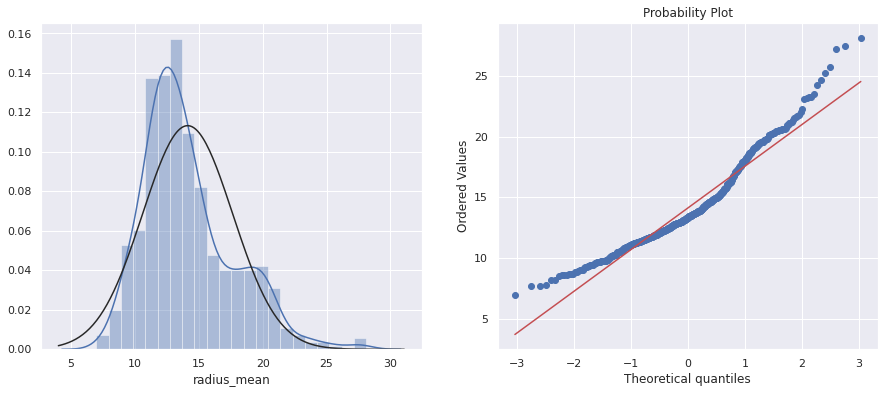

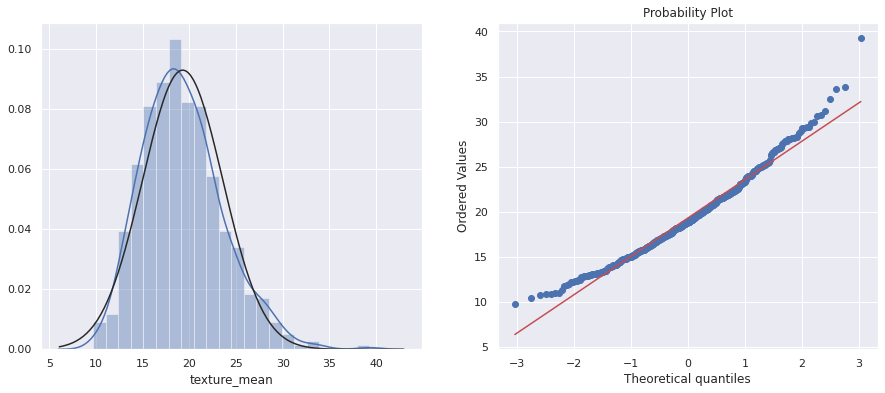

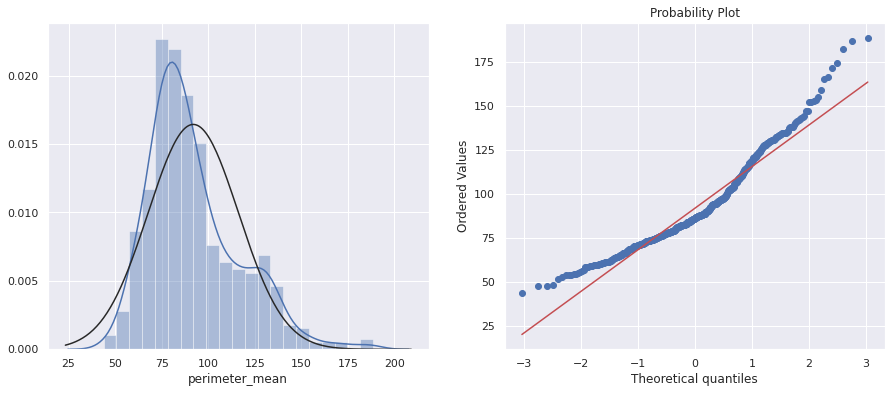

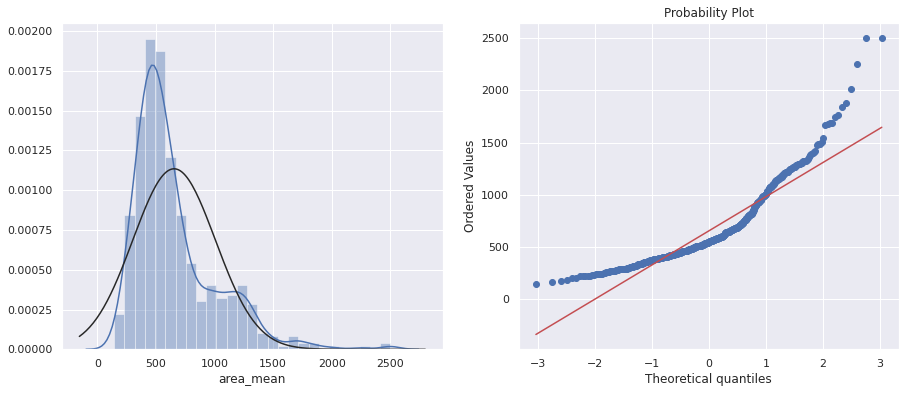

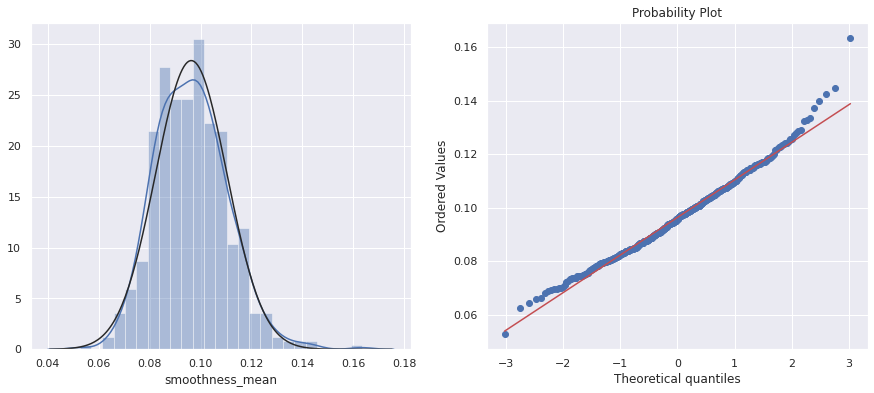

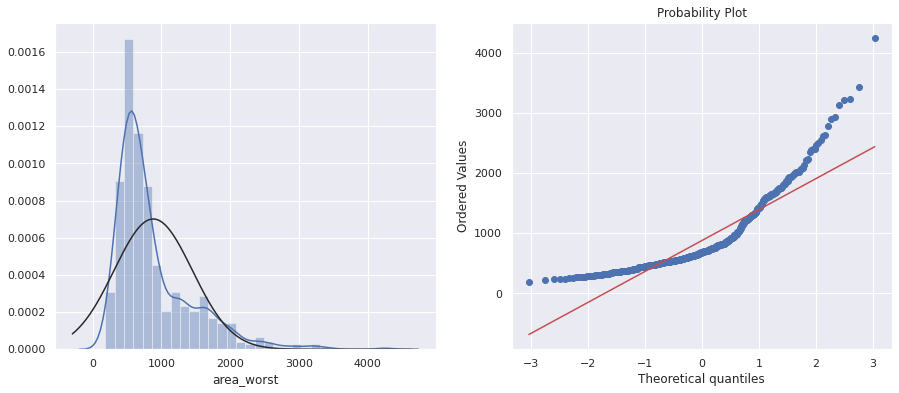

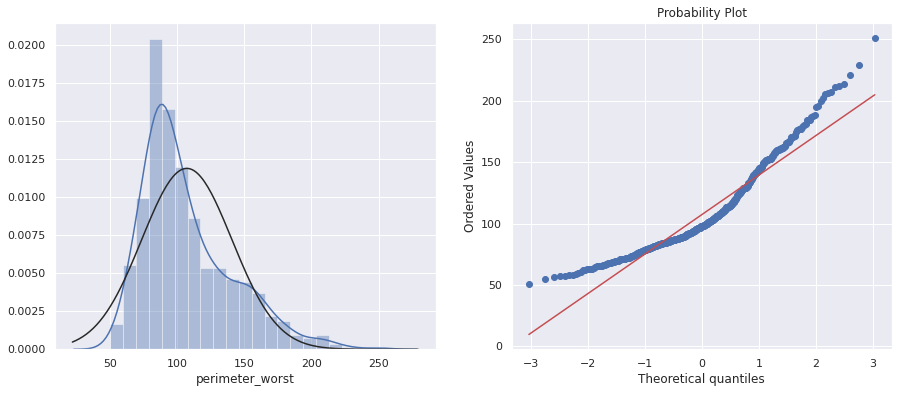

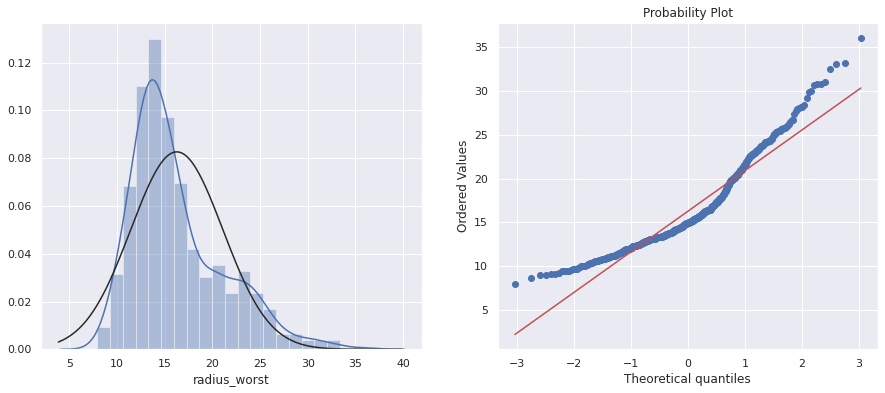

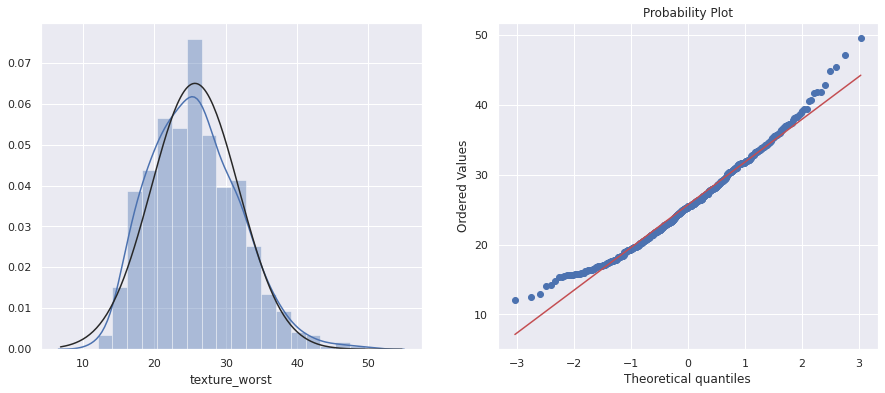

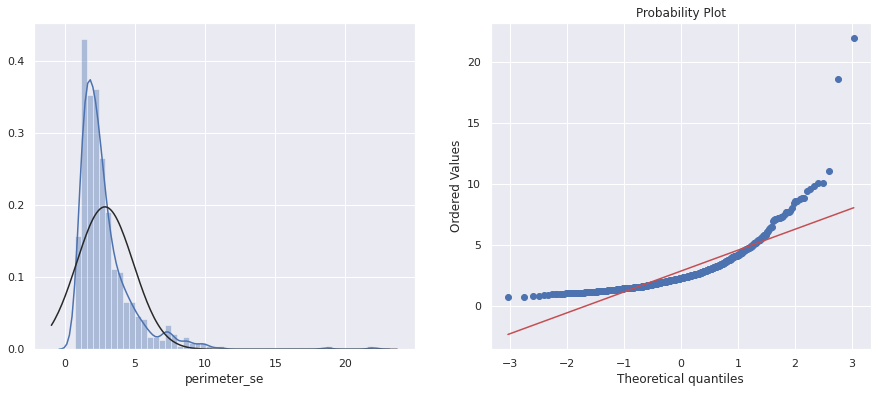

In [21]:
diagnostic_plots(df_new, 'radius_mean')
diagnostic_plots(df_new, 'texture_mean')
diagnostic_plots(df_new, 'perimeter_mean')
diagnostic_plots(df_new, 'area_mean')
diagnostic_plots(df_new, 'smoothness_mean')
diagnostic_plots(df_new, 'area_worst')
diagnostic_plots(df_new, 'perimeter_worst')
diagnostic_plots(df_new, 'radius_worst')
diagnostic_plots(df_new, 'texture_worst')
diagnostic_plots(df_new, 'perimeter_se')

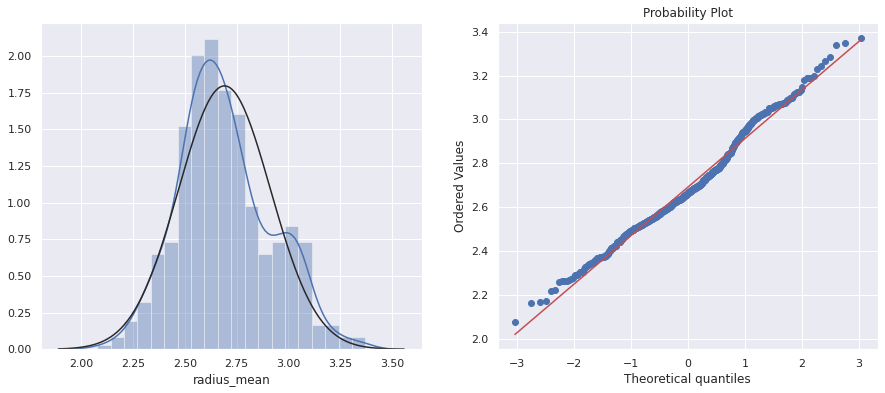

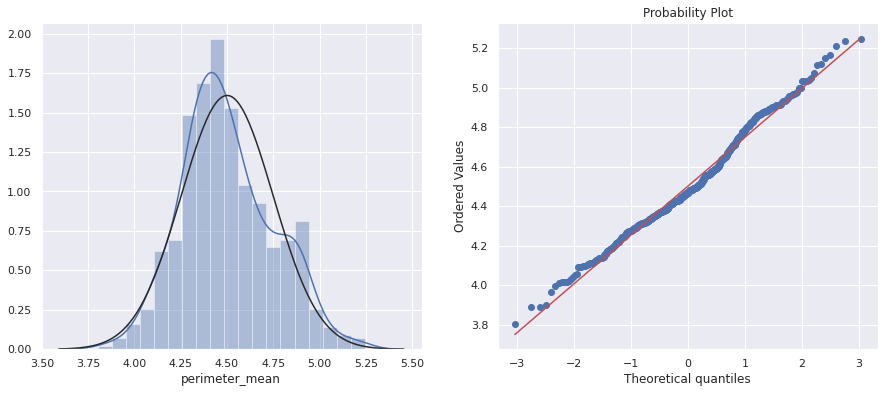

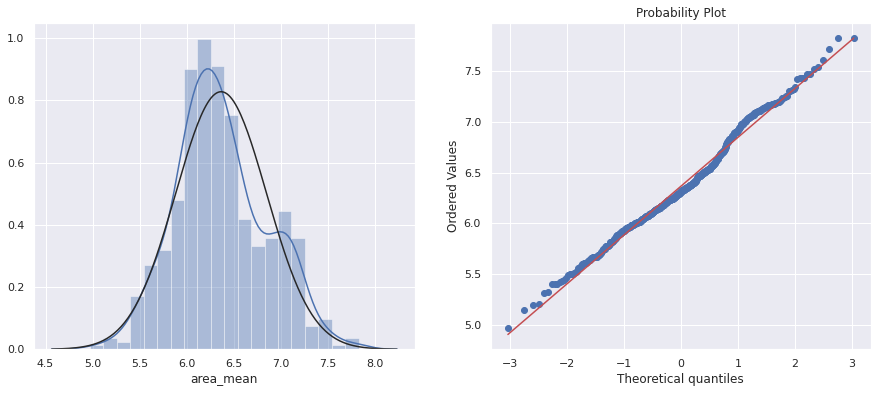

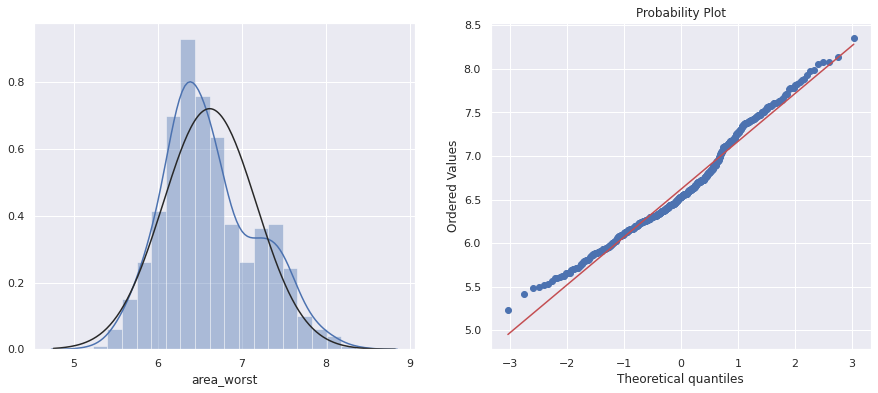

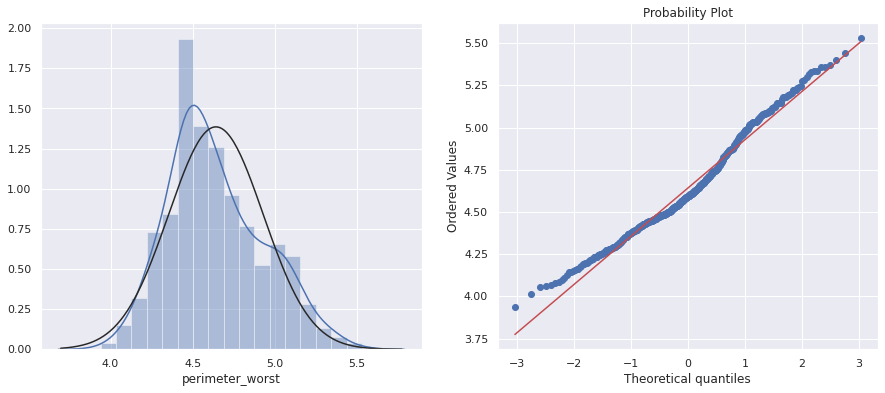

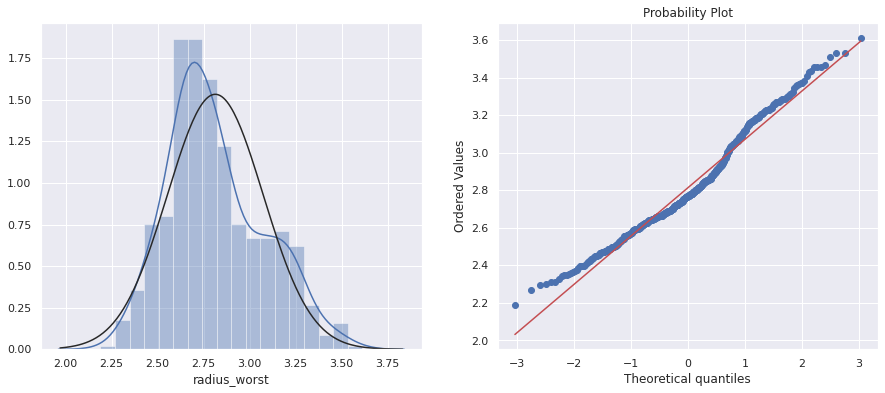

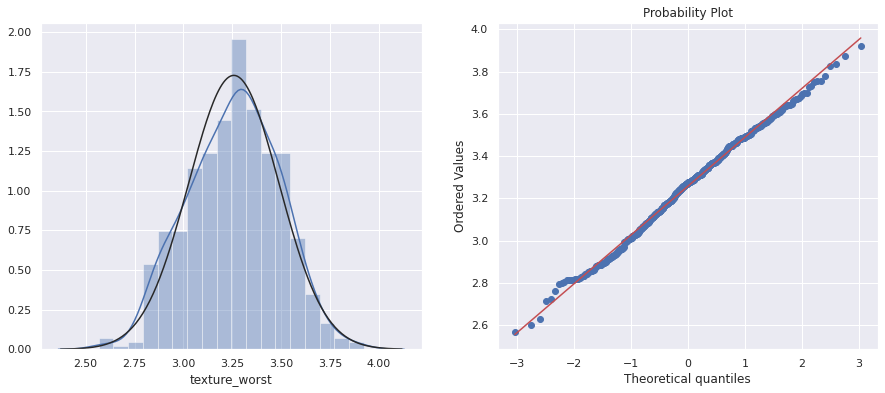

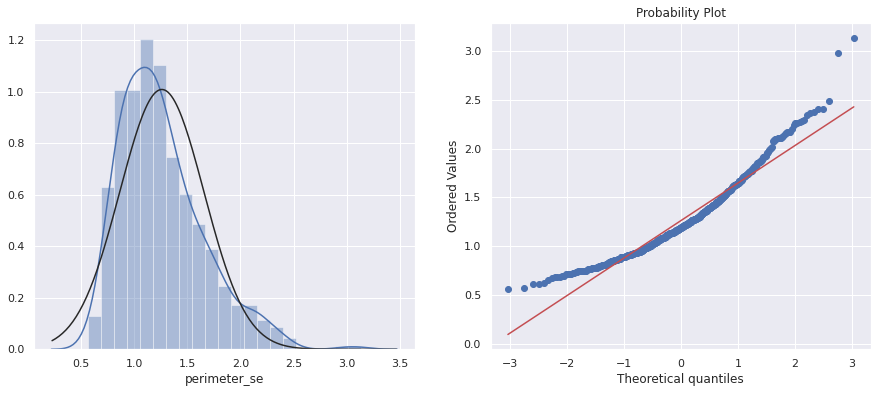

In [22]:
#applying log transformation to convert radius_mean into a gaussian distribution
df_new['radius_mean'] = np.log(df_new['radius_mean'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df_new, 'radius_mean')

#applying log transformation to convert texture_mean into a gaussian distribution
##df_new['texture_mean'] = np.log(df_new['texture_mean'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
##diagnostic_plots(df_new, 'texture_mean')

#applying log transformation
df_new['perimeter_mean'] = np.log(df_new['perimeter_mean'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df_new, 'perimeter_mean')

#applying log transformation
df_new['area_mean'] = np.log(df_new['area_mean'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df_new, 'area_mean')

#applying log transformation
df_new['area_worst'] = np.log(df_new['area_worst'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df_new, 'area_worst')

#applying log transformation
df_new['perimeter_worst'] = np.log(df_new['perimeter_worst'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df_new, 'perimeter_worst')

#applying log transformation
df_new['radius_worst'] = np.log(df_new['radius_worst'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df_new, 'radius_worst')

#applying log transformation
df_new['texture_worst'] = np.log(df_new['texture_worst'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df_new, 'texture_worst')

#applying log transformation
df_new['perimeter_se'] = np.log(df_new['perimeter_se'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df_new, 'perimeter_se')

#**Modelling**

In [23]:
y = df_new['diagnosis'] ### Our target variable
X = df_new.drop(['diagnosis'], axis = 1) ### Input features
y.head(3)

0    1
1    1
2    1
Name: diagnosis, dtype: int64

In [24]:
###splitting dataset into train and test sets with train to test set ratio as 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Feature Selection**
I have used ExtraTreesClassifier from scikit learn module which is a tree based classifier and can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features.

[0.06236089 0.01664255 0.06431599 0.06131801 0.00779287 0.01805748
 0.05806302 0.07369793 0.00736599 0.02505073 0.03310965 0.03901086
 0.00898383 0.0088296  0.00887307 0.07699415 0.02399726 0.09562853
 0.09071223 0.02535813 0.03152734 0.03820249 0.09576173 0.01724264
 0.01110302]


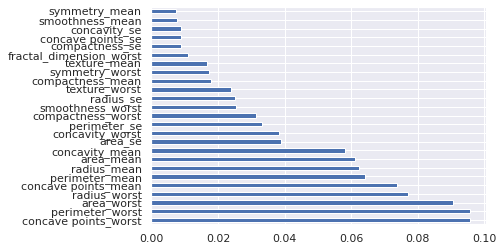

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_imp = pd.Series(model.feature_importances_, index = X.columns)
feat_imp.nlargest(25).plot(kind = 'barh')
plt.show()

Dropping the less relevant features to obtain a better dataset.

In [27]:
df_new = df_new.drop(['compactness_se','smoothness_mean','concavity_se','symmetry_mean',\
                      'fractal_dimension_worst','texture_mean'],axis = 1)

In [28]:
y = df_new['diagnosis'] ### Our target variable
X = df_new.drop(['diagnosis'], axis = 1) ### Input features
y.head(3)

0    1
1    1
2    1
Name: diagnosis, dtype: int64

In [29]:
###splitting dataset into train and test sets with train to test set ratio as 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization transforms data to have a mean of zero and a standard deviation of 1 which improves the linear model performance. Models such as Logistic Regression, Support Vector Machine, K Nearest Neighbours shows improved model performances, whereas the Tree based model and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [30]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_log = logreg.predict(X_test)
accu_reg = accuracy_score(y_test, Y_pred_log)
print("Accuracy score using Logistic Regression:", accu_reg*100)

Accuracy score using Logistic Regression: 96.49122807017544


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
#logistic regression with feature scaling
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_sc, y_train)
Y_pred_log = logreg.predict(X_test_sc)
accu_reg = accuracy_score(y_test, Y_pred_log)
print("Accuracy score using Logistic Regression with feature scaling:", accu_reg*100)

Accuracy score using Logistic Regression with feature scaling: 99.12280701754386


In [34]:
#support vector machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svm = svc.predict(X_test)
accu_svc = accuracy_score(y_test, Y_pred_svm)
print("Accuracy score using Support Vector Machine:", accu_svc*100)

Accuracy score using Support Vector Machine: 92.10526315789474


In [35]:
#support vector machine with feature scaling
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_sc, y_train)
Y_pred_svm = svc.predict(X_test_sc)
accu_svc = accuracy_score(y_test, Y_pred_svm)
print("Accuracy score using Support Vector Machine with feature scaling:", accu_svc*100)

Accuracy score using Support Vector Machine with feature scaling: 96.49122807017544


In [36]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = svc.predict(X_test)
accu_knn = accuracy_score(y_test, Y_pred_knn)
print("Accuracy score using K nearest neighbours", accu_knn*100)

Accuracy score using K nearest neighbours 37.719298245614034


In [37]:
#knn with feature scaling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_sc, y_train)
Y_pred_knn = svc.predict(X_test_sc)
accu_knn = accuracy_score(y_test, Y_pred_knn)
print("Accuracy score using K nearest neighbours with feature scaling:", accu_knn*100)

Accuracy score using K nearest neighbours with feature scaling: 96.49122807017544


In [38]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_nb = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test, Y_pred_nb)
print("Accuracy score using Gaussian Naive Bayes:", acc_gaussian*100)

Accuracy score using Gaussian Naive Bayes: 95.6140350877193


In [39]:
# Gaussian Naive Bayes with feature scaling
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train_sc, y_train)
Y_pred_nb = gaussian.predict(X_test_sc)
acc_gaussian = accuracy_score(y_test, Y_pred_nb)
print("Accuracy score using Gausian Naive Bayes with feature scaling:", acc_gaussian*100)

Accuracy score using Gausian Naive Bayes with feature scaling: 95.6140350877193


In [40]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, Y_pred_dt)
print("Accuracy score using Decision Tree:", acc_decision_tree*100)

Accuracy score using Decision Tree: 91.22807017543859


In [41]:
# Decision Tree with feature scaling
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sc, y_train)
Y_pred_dt = decision_tree.predict(X_test_sc)
acc_decision_tree = accuracy_score(y_test, Y_pred_dt)
print("Accuracy score using Decision Tree with feature scaling:", acc_decision_tree*100)

Accuracy score using Decision Tree with feature scaling: 91.22807017543859


In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = accuracy_score(y_test, Y_pred_rf)
print("Accuracy score using Random Forest:", acc_random_forest*100)

Accuracy score using Random Forest: 96.49122807017544


In [43]:
# Random Forest with feature scaling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_sc, y_train)
Y_pred_rf = random_forest.predict(X_test_sc)
random_forest.score(X_train, y_train)
acc_random_forest = accuracy_score(y_test, Y_pred_rf)
print("Accuracy score using Random Forest with feature scaling:", acc_random_forest*100)

Accuracy score using Random Forest with feature scaling: 95.6140350877193


In [44]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy score using XG Boost Classifier:", acc_xgb*100)

Accuracy score using XG Boost Classifier: 96.49122807017544


In [46]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_sc, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_sc)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy score using XG Boost Classifier with feature scaling:", acc_xgb*100)

Accuracy score using XG Boost Classifier with feature scaling: 96.49122807017544


In [47]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Decision Tree',
              'Random Forest', 'Naive Bayes', 'XG Boost'],
    'Score': [accu_svc, accu_knn, accu_reg, acc_decision_tree,
              acc_random_forest, acc_gaussian, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.991228
0,Support Vector Machines,0.964912
1,KNN,0.964912
6,XG Boost,0.964912
4,Random Forest,0.956140
5,Naive Bayes,0.956140
3,Decision Tree,0.912281


Logistic Regression shows the highest accuracy of 99.12%. So we shall use it as our model.

**Confusion Matrix**

The confusion matrix score has type I error as 0 and type II error as 1 which indicates a good model performance.

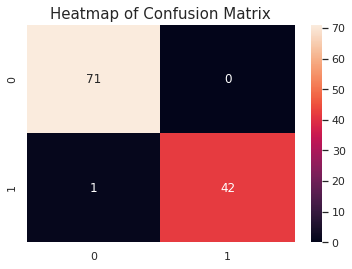

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_log)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



#**Cross-validation of the ML model**
Cross-Validation is a technique used to test the effectiveness of a machine learning model, it is also a re-sampling procedure used to evaluate a model if we have a limited data. Here 10 folds cross-validation is taken which gave lesser accuracy than that obtained from the Logistic Regression model's accuracy. This indicates that there is overfitting in the model, which can be overcomed using larger dataset.

In [57]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = logreg, X = X_train_sc, y = y_train, cv = 20)
print("Cross validation of Logistic Regression model = ",cross_validation)
print("Cross validation of Logistic Regression model (in mean) = ",cross_validation.mean())


Cross validation of Logistic Regression model =  [1.         0.95652174 1.         0.95652174 1.         0.95652174
 0.95652174 0.91304348 0.95652174 1.         1.         1.
 1.         1.         1.         0.90909091 1.         0.95454545
 0.90909091 0.95454545]
Cross validation of Logistic Regression model (in mean) =  0.9711462450592885


The mean accuracy value of **cross-validation is 97.11%** and **Logistic Regression model accuracy is 99.12%**. It is showing Logistic Regression is slightly overfitted but when training data will be more, it will be a generalized model.

Hence, the model can serve our purpose as it has **more than 95% accuracy score** to predict Breast Cancer in patients.

*Thank You for reading it till the end.*